# **CIFAR-10**

**Benedictus Bayu Pramudhito**

In [30]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


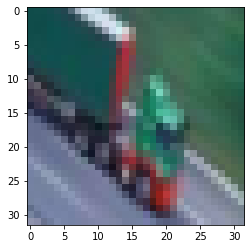

In [31]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Train", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))

In [32]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [33]:
X_train.shape #dimensi dari gambar, ada 3 dimensi karena gambarnya rgb bukan greyscale

(50000, 32, 32, 3)

In [34]:
#lakukan feature engineering seperti one hot encoding agar mesin bisa mengetahui problem klasifikasi dari dataset
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [35]:
#casting dataset menjadi float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0 #rescale agar nilainya 0 hingga 1
X_test = X_test / 255.0

In [36]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_augmented_iteration = train_datagen.flow(X_train, y_train, batch_size=128)
test_augmented_iteration = test_datagen.flow(X_test, y_test, batch_size=128)
"""

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [38]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

## **Deep Learning CNN Model**

In [43]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
                    MaxPooling2D(2, 2),
                    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                    MaxPooling2D(2, 2),
                    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                  ])

opt = SGD(learning_rate=0.001, momentum=0.9)

model.summary()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

In [44]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 3s 4ms/step - loss: 1.7580 - accuracy: 0.3728 - val_loss: 1.4935 - val_accuracy: 0.4660
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.4206 - accuracy: 0.4926 - val_loss: 1.3613 - val_accuracy: 0.5119
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.2700 - accuracy: 0.5530 - val_loss: 1.2326 - val_accuracy: 0.5659
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 1.1665 - accuracy: 0.5897 - val_loss: 1.1321 - val_accuracy: 0.5963
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.0811 - accuracy: 0.6212 - val_loss: 1.0924 - val_accuracy: 0.6183
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.0213 - accuracy: 0.6420 - val_loss: 1.0284 - val_accuracy: 0.6413
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 0.9632 - accuracy: 0.6634 - val_loss: 0.9796 - val_accuracy: 0.6536
Epoch 

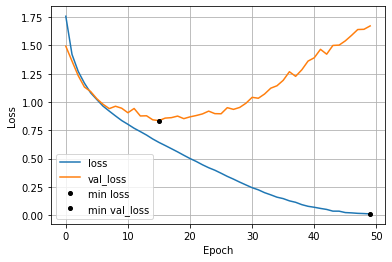

Minimum Loss             : 49    0.010381
Name: loss, dtype: float64

Minimum Validation Loss  : 15    0.835409
Name: val_loss, dtype: float64


In [45]:
plot_loss_new(history)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN diatas, terlihat bahwa garis lossnya memang sudah mencapai titik terendahnya dengan 50 epoch, walaupun grafik val_lossnya mengalami peningkatan setelah 15 epoch. Nilai val_loss terendah diperoleh saat epochnya sekitar 15, dimana diperoleh val_loss: 0.835409 dan val_accuracy: 0.7176

## **VGG**

In [10]:
from tensorflow.keras.applications import vgg16, vgg19
from tensorflow.keras.layers import Dropout

In [39]:
#VGG Block
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))

In [40]:
opt = SGD(learning_rate=0.001, momentum=0.9)

model1.summary()

model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [41]:
history_vgg = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 5s 7ms/step - loss: 2.0846 - accuracy: 0.2234 - val_loss: 1.7795 - val_accuracy: 0.3636
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7280 - accuracy: 0.3613 - val_loss: 1.5830 - val_accuracy: 0.4225
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5814 - accuracy: 0.4130 - val_loss: 1.4225 - val_accuracy: 0.4876
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4858 - accuracy: 0.4538 - val_loss: 1.3622 - val_accuracy: 0.5015
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4153 - accuracy: 0.4831 - val_loss: 1.2764 - val_accuracy: 0.5393
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.3545 - accuracy: 0.5085 - val_loss: 1.2052 - val_accuracy: 0.5682
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2993 - accuracy: 0.5304 - val_loss: 1.1726 - val_accuracy: 0.5889
Epoch 

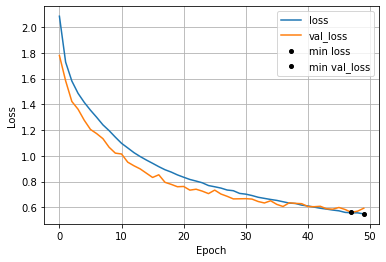

Minimum Loss             : 49    0.548875
Name: loss, dtype: float64

Minimum Validation Loss  : 47    0.560704
Name: val_loss, dtype: float64


In [42]:
plot_loss_new(history_vgg)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN diatas, terlihat bahwa model yang kita buat sudah bagus karena tidak overfit dan juga tidak underfitting, grafiknya pun sudah cukup landai. Nilai val_loss terendah diperoleh saat epochnya 48, dimana diperoleh val_loss: 0.5607 dan val_accuracy: 0.8081`

## **Deep Learning CNN Model with Variation**

In [46]:
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)       

In [47]:
from tensorflow.keras.optimizers import RMSprop

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [48]:
history_newlayers = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 5s 6ms/step - loss: 2.2635 - accuracy: 0.1361 - val_loss: 2.0608 - val_accuracy: 0.2470
Epoch 2/50
782/782 [==============================] - 4s 6ms/step - loss: 2.0078 - accuracy: 0.2593 - val_loss: 1.8931 - val_accuracy: 0.3298
Epoch 3/50
782/782 [==============================] - 4s 6ms/step - loss: 1.8105 - accuracy: 0.3374 - val_loss: 1.6671 - val_accuracy: 0.4061
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 1.7117 - accuracy: 0.3742 - val_loss: 1.6123 - val_accuracy: 0.4165
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.6371 - accuracy: 0.4021 - val_loss: 1.5197 - val_accuracy: 0.4488
Epoch 6/50
782/782 [==============================] - 4s 6ms/step - loss: 1.5640 - accuracy: 0.4297 - val_loss: 1.4597 - val_accuracy: 0.4714
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - loss: 1.5050 - accuracy: 0.4497 - val_loss: 1.3866 - val_accuracy: 0.4999
Epoch 

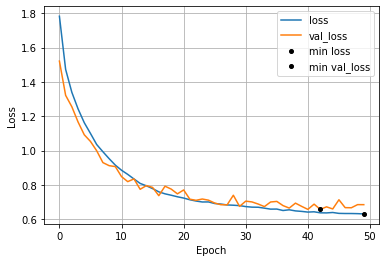

Minimum Loss             : 49    0.630435
Name: loss, dtype: float64

Minimum Validation Loss  : 42    0.65664
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history_newlayers)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN diatas, terlihat bahwa garis lossnya memang sudah mencapai titik terendahnya dengan 50 epoch, begitupula dengan grafik val_loss yang terus menurun walaupun sempat mengalami peningkatan sedikit. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 42, dimana diperoleh val_loss: 0.65664 dan val_accuracy: 0.7802

Model terbaik diperoleh dengan **VGG Block** dengan val_loss 0.5607 dan val_accuracy 0.8081